In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from torch.nn import Softplus #smooth relu
import torch.nn as nn
import torch.nn.functional as F
from utils import generate_polynomial_data
import numpy as np
import torch
import torch.optim as optim
from torch.nn import MSELoss
from tqdm import tqdm

from model import Net, check_loss_landscape

/afs/csail.mit.edu/u/m/melango/.conda/envs/p3t14/lib/python3.6/site-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


In [9]:
suffix = "7"

n = 5000
d = 10000
generate_data = True

coeffs = np.random.rand(d, 1)
xvals = np.random.rand(n)
if generate_data:
    print("Generating Data...")
    X, Y = generate_polynomial_data(coeffs, xvals)
    with open("./datasets/X%s.npy" %suffix, "wb") as f:
        np.save(f, X)
    with open("./datasets/Y%s.npy" %suffix, "wb") as f:
        np.save(f, Y)
    with open("./datasets/coeffs%s.npy" %suffix, "wb") as f:
        np.save(f, coeffs)
else:
    with open("./datasets/X%s.npy" %suffix, 'rb') as f:
        X = np.load(f)
    with open("./datasets/Y%s.npy" %suffix, 'rb') as f:
        Y = np.load(f)
    with open("./datasets/coeffs%s.npy" %suffix, 'rb') as f:
        coeffs = np.load(f)

  0%|          | 3/5000 [00:00<02:55, 28.41it/s]

Generating Data...


100%|██████████| 5000/5000 [01:33<00:00, 53.22it/s]


Running on GPU
Running on GPU


  0%|          | 3/2000 [00:00<01:28, 22.54it/s]

Epoch 1 iteration 2000 loss: nan


  0%|          | 3/2000 [00:00<01:37, 20.50it/s]

Epoch 2 iteration 2000 loss: nan


  0%|          | 3/2000 [00:00<01:28, 22.66it/s]

Epoch 3 iteration 2000 loss: nan


  0%|          | 3/2000 [00:00<01:28, 22.58it/s]

Epoch 4 iteration 2000 loss: nan


  0%|          | 3/2000 [00:00<01:28, 22.44it/s]

Epoch 5 iteration 2000 loss: nan


  0%|          | 3/2000 [00:00<01:28, 22.68it/s]

Epoch 6 iteration 2000 loss: nan


  0%|          | 3/2000 [00:00<01:28, 22.66it/s]

Epoch 7 iteration 2000 loss: nan


  0%|          | 3/2000 [00:00<01:29, 22.41it/s]

Epoch 8 iteration 2000 loss: nan


  0%|          | 3/2000 [00:00<01:28, 22.66it/s]

Epoch 9 iteration 2000 loss: nan


  0%|          | 3/2000 [00:00<01:28, 22.67it/s]

Epoch 10 iteration 2000 loss: nan


  0%|          | 3/2000 [00:00<01:28, 22.69it/s]

Epoch 11 iteration 2000 loss: nan


  0%|          | 3/2000 [00:00<01:28, 22.65it/s]

Epoch 12 iteration 2000 loss: nan


  0%|          | 3/2000 [00:00<01:28, 22.65it/s]

Epoch 13 iteration 2000 loss: nan


  0%|          | 3/2000 [00:00<01:28, 22.69it/s]

Epoch 14 iteration 2000 loss: nan


  0%|          | 3/2000 [00:00<01:27, 22.70it/s]

Epoch 15 iteration 2000 loss: nan


  0%|          | 3/2000 [00:00<01:28, 22.58it/s]

Epoch 16 iteration 2000 loss: nan


  0%|          | 3/2000 [00:00<01:28, 22.68it/s]

Epoch 17 iteration 2000 loss: nan


  0%|          | 3/2000 [00:00<01:28, 22.68it/s]

Epoch 18 iteration 2000 loss: nan


  0%|          | 3/2000 [00:00<01:28, 22.60it/s]

Epoch 19 iteration 2000 loss: nan


100%|██████████| 2000/2000 [01:28<00:00, 22.55it/s]


Epoch 20 iteration 2000 loss: nan


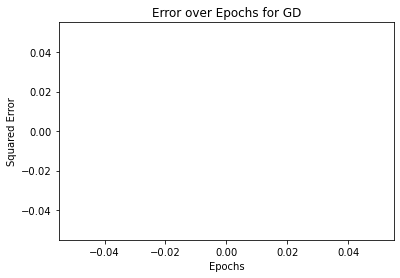

In [13]:
torch.manual_seed(0)

sgd = False
train = True

if sgd:
    model_path = "./models/model_sgd_%s.pt"%suffix
    net = Net(d, epochs = 50)
else:
    model_path = "./models/model_%s.pt"%suffix
    net = Net(d, epochs = 20)
    
if train:
    if torch.cuda.is_available():
        device = torch.device("cuda:0")
        print("Running on GPU")
    net.to(device)
    if sgd:
        net.train_sgd(X, Y, 100000, lr = 1e-2)
    else:
        net.train_gd(X, Y, 2000, lr = 1e-3)
    torch.save(net.state_dict(), model_path)

Overall loss: tensor(nan, grad_fn=<MseLossBackward>)


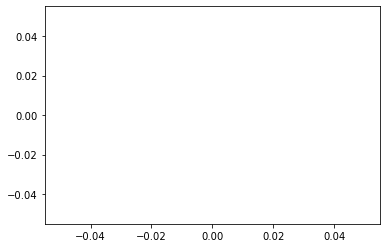

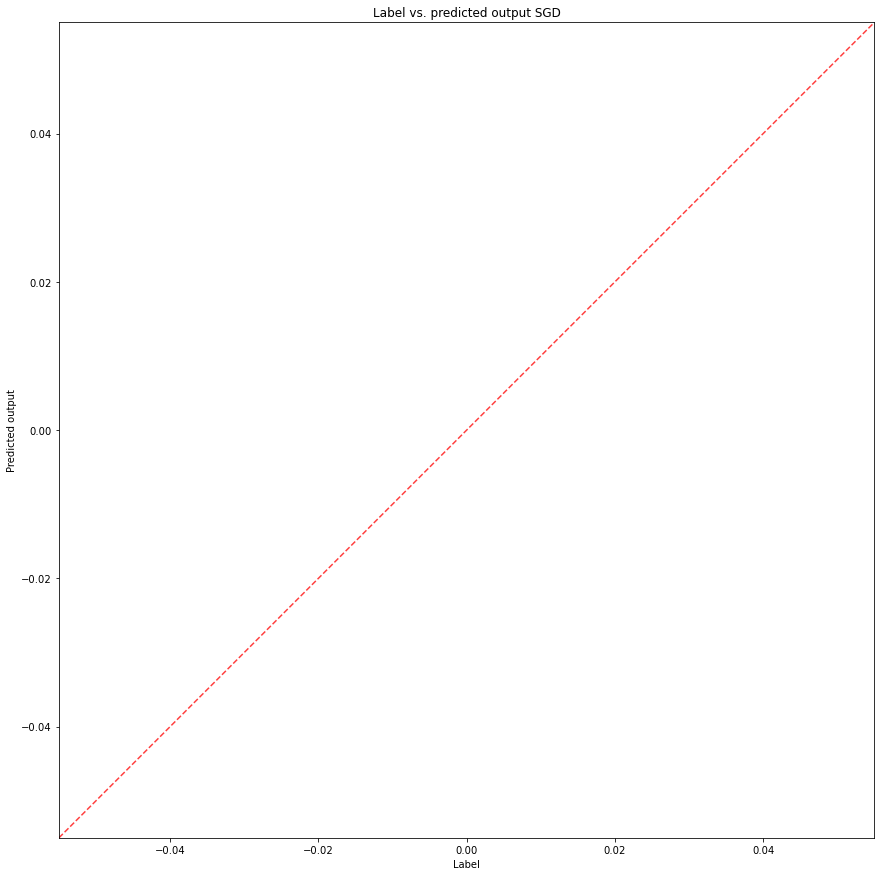

In [14]:
check_loss_landscape(model_path, X, Y, sgd=True)

In [ ]:
torch.manual_seed(0)

sgd = True
train = True

if sgd:
    model_path = "./models/model_sgd_%s.pt"%suffix
    net = Net(d, epochs = 50)
else:
    model_path = "./models/model_%s.pt"%suffix
    net = Net(d, epochs = 20)
    
if train:
    if torch.cuda.is_available():
        device = torch.device("cuda:0")
        print("Running on GPU")
    net.to(device)
    if sgd:
        net.train_sgd(X, Y, 100000, lr = 1e-2)
    else:
        net.train_gd(X, Y, 5000, lr = 1e-4)
    torch.save(net.state_dict(), model_path)

In [ ]:
check_loss_landscape(model_path, X, Y, sgd=True)

# old

In [ ]:
net = Net(d, epochs = 20)

In [ ]:
device = torch.device("cuda:0")
net.to(device)

In [ ]:
net.train_gd(X, Y, 5000, lr = 1e-4)

In [ ]:
device = next(net.parameters()).device

In [ ]:
X_cuda = torch.from_numpy(X).to(device)
Y_cuda = torch.from_numpy(Y).to(device)

In [ ]:
n, d = X_cuda.size()
print(n)
print(d)

In [ ]:
net.train_gd(X, Y, T=5000, lr=1e-4)

In [ ]:
suffix = "sgd_20_epochs"
torch.save(net.state_dict(), "./models/model%s.pt"%suffix)